In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
path = '/Users/tgardner/ARMADA_orbits'
path_etalon = '/Users/tgardner/etalon_epochs/etalon_fits/etalon_factors_fit.txt'
path_wds = '/Users/tgardner/wds_targets'
path_orb6 = '/Users/tgardner/catalogs/orb6orbits.sql.txt'

In [4]:
###########################################
## Specify Target
###########################################
target_hd = '6456'
date = 'epoch_test'
distance = 84
mass_star1 = 2.4
mass_star2 = 1.9

In [18]:
###########################################
## Read in planet injection files
###########################################
detection_period = '/Users/tgardner/ARMADA_orbits/HD6456_chi2err_sim/HD6456_allepochs_bic_per.npy'
semi_period = '/Users/tgardner/ARMADA_orbits/HD6456_chi2err_sim/HD6456_allepochs_bic_semi.npy'
percentage_recovered = '/Users/tgardner/ARMADA_orbits/HD6456_chi2err_sim/HD6456_allepochs_bic_percent.npy'

detection_period_1yr = '/Users/tgardner/ARMADA_orbits/HD6456_chi2err_sim/HD6456_1yr_bic_per.npy'
semi_period_1yr = '/Users/tgardner/ARMADA_orbits/HD6456_chi2err_sim/HD6456_1yr_bic_semi.npy'
percentage_recovered_1yr = '/Users/tgardner/ARMADA_orbits/HD6456_chi2err_sim/HD6456_1yr_bic_percent.npy'

detection_period_2yr = '/Users/tgardner/ARMADA_orbits/HD6456_chi2err_sim/HD6456_2yr_bic_per.npy'
semi_period_2yr = '/Users/tgardner/ARMADA_orbits/HD6456_chi2err_sim/HD6456_2yr_bic_semi.npy'
percentage_recovered_2yr = '/Users/tgardner/ARMADA_orbits/HD6456_chi2err_sim/HD6456_2yr_bic_percent.npy'

detection_period_3yr = '/Users/tgardner/ARMADA_orbits/HD6456_chi2err_sim/HD6456_3yr_bic_per.npy'
semi_period_3yr = '/Users/tgardner/ARMADA_orbits/HD6456_chi2err_sim/HD6456_3yr_bic_semi.npy'
percentage_recovered_3yr = '/Users/tgardner/ARMADA_orbits/HD6456_chi2err_sim/HD6456_3yr_bic_percent.npy'

In [19]:
detection_period = np.load(detection_period)
semi_period = np.load(semi_period)
percentage_recovered= np.load(percentage_recovered)

detection_period_1yr = np.load(detection_period_1yr)
semi_period_1yr = np.load(semi_period_1yr)
percentage_recovered_1yr= np.load(percentage_recovered_1yr)

detection_period_2yr = np.load(detection_period_2yr)
semi_period_2yr = np.load(semi_period_2yr)
percentage_recovered_2yr= np.load(percentage_recovered_2yr)

detection_period_3yr = np.load(detection_period_3yr)
semi_period_3yr = np.load(semi_period_3yr)
percentage_recovered_3yr= np.load(percentage_recovered_3yr)

In [21]:
X,Y = np.meshgrid(detection_period,semi_period)
Z = np.swapaxes(percentage_recovered,0,1)

X_1yr,Y_1yr = np.meshgrid(detection_period_1yr,semi_period_1yr)
Z_1yr = np.swapaxes(percentage_recovered_1yr,0,1)

X_2yr,Y_2yr = np.meshgrid(detection_period_2yr,semi_period_2yr)
Z_2yr = np.swapaxes(percentage_recovered_2yr,0,1)

X_3yr,Y_3yr = np.meshgrid(detection_period_3yr,semi_period_3yr)
Z_3yr = np.swapaxes(percentage_recovered_3yr,0,1)

abin1 = ((detection_period/365.25)**2*mass_star1)**(1/3)
abin2 = ((detection_period/365.25)**2*mass_star2)**(1/3)
mass_planet1 = mass_star1/(abin1-Y*distance/1000)*(Y*distance/1000)/0.0009546
mass_planet2 = mass_star2/(abin2-Y*distance/1000)*(Y*distance/1000)/0.0009546

abin1_1yr = ((detection_period_1yr/365.25)**2*mass_star1)**(1/3)
abin2_1yr = ((detection_period_1yr/365.25)**2*mass_star2)**(1/3)
mass_planet1_1yr = mass_star1/(abin1_1yr-Y_1yr*distance/1000)*(Y_1yr*distance/1000)/0.0009546
mass_planet2_1yr = mass_star2/(abin2_1yr-Y_1yr*distance/1000)*(Y_1yr*distance/1000)/0.0009546

abin1_2yr = ((detection_period_2yr/365.25)**2*mass_star1)**(1/3)
abin2_2yr = ((detection_period_2yr/365.25)**2*mass_star2)**(1/3)
mass_planet1_2yr = mass_star1/(abin1_2yr-Y_2yr*distance/1000)*(Y_2yr*distance/1000)/0.0009546
mass_planet2_2yr = mass_star2/(abin2_2yr-Y_2yr*distance/1000)*(Y_2yr*distance/1000)/0.0009546

abin1_3yr = ((detection_period_3yr/365.25)**2*mass_star1)**(1/3)
abin2_3yr = ((detection_period_3yr/365.25)**2*mass_star2)**(1/3)
mass_planet1_3yr = mass_star1/(abin1_3yr-Y_3yr*distance/1000)*(Y_3yr*distance/1000)/0.0009546
mass_planet2_3yr = mass_star2/(abin2_3yr-Y_3yr*distance/1000)*(Y_3yr*distance/1000)/0.0009546

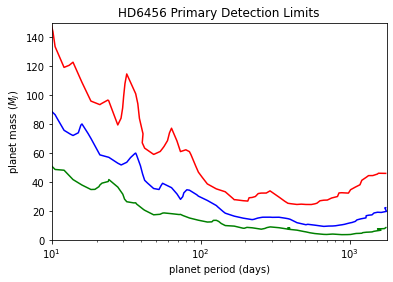

In [37]:
contour =  plt.contour(X,mass_planet1,Z,levels=[66],colors='green')
contour2 =  plt.contour(X_1yr,mass_planet1_1yr,Z_1yr,levels=[66],colors='red')
contour3 =  plt.contour(X_2yr,mass_planet1_2yr,Z_2yr,levels=[66],colors='blue')
#contour =  plt.contour(X_3yr,mass_planet1_3yr,Z_3yr,levels=[99],colors='grey')

#plt.clabel(contour,inline=False,fmt='%1.0f',colors='black')
#plt.plot(detection_period,mass_planet1_25,'--',linewidth=2,color='black',label="25 $\mu$as wobble")
#plt.plot(detection_period,mass_planet1_50,'--',linewidth=2,color='black',label="50 $\mu$as wobble")
#plt.plot(detection_period,mass_planet1_100,'--',linewidth=2,color='black',label="100 $\mu$as wobble")

plt.xscale('log')
#plt.yscale('log')
plt.xlabel('planet period (days)')
plt.ylabel('planet mass ($M_J$)')
plt.ylim(0,150)
plt.xlim(10,np.max(detection_period))
#plt.axis('equal')
plt.title('HD%s Primary Detection Limits'%target_hd)
#plt.colorbar(ticks=[20,40,60,80,100],label="planets recovered").set_ticklabels(['20%','40%','60%','80%','100%'])
#plt.legend()
#plt.savefig('%s/mass_limits/HD%s_%s_bic_masslimit1.pdf'%(path,target_hd,date))
plt.show()

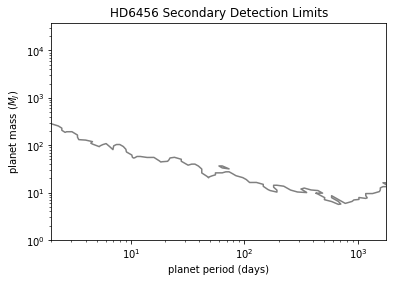

In [17]:
contour =  plt.contour(X,mass_planet2,Z,levels=[99],colors='grey')
#plt.clabel(contour,inline=False,fmt='%1.0f',colors='black')
#plt.plot(detection_period,mass_planet2_25,'--',linewidth=2,color='black',label="25 $\mu$as wobble")
#plt.plot(detection_period,mass_planet2_50,'--',linewidth=2,color='black',label="50 $\mu$as wobble")
#plt.plot(detection_period,mass_planet2_100,'--',linewidth=2,color='black',label="100 $\mu$as wobble")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('planet period (days)')
plt.ylabel('planet mass ($M_J$)')
plt.ylim(1,np.max(mass_planet2))
plt.xlim(np.min(detection_period),np.max(detection_period))
#plt.axis('equal')
plt.title('HD%s Secondary Detection Limits'%target_hd)
#plt.colorbar(ticks=[20,40,60,80,100],label="planets recovered").set_ticklabels(['20%','40%','60%','80%','100%'])
#plt.legend()
#plt.savefig('%s/mass_limits/HD%s_%s_bic_masslimit2.pdf'%(path,target_hd,date))
plt.show()